#  課題

#### =========================================================================================

###    1.タイトル：形状や生息地等の特性からキノコが食用か有毒かを識別する
###    2.kaggle2『Mushroom Classification』

####   ●kaggle　https://www.kaggle.com/uciml/mushroom-classification/data
####   ●関連サイト https://edu.deepanalytics.jp/datasets/19     https://archive.ics.uci.edu/ml/datasets/Mushroom

![mr.png](attachment:mr.png)

![Imgur](https://i.imgur.com/vchnLBC.jpg)

![Imgur](https://i.imgur.com/2F9PNJU.jpg)

#### =========================================================================================

In [2]:
import pandas as pd
import numpy as np

#CSVファイル読み込み
df_csv =pd.read_csv('mushrooms.csv')

#### データ前処理(質的変数をダミー変数へ)

In [3]:
Y = pd.get_dummies(df_csv.iloc[:,0],  drop_first=False)
X = pd.DataFrame()
for each in df_csv.iloc[:,1:].columns:
    dummies = pd.get_dummies(df_csv[each], prefix=each, drop_first=False)
    X = pd.concat([X, dummies], axis=1)

#### 機械学習モデルをリストに格納

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

models = []
models.append(('LR(ロジスティツク回帰)', LogisticRegression()))
models.append(('KNN(K近傍法)', KNeighborsClassifier()))
models.append(('CART(決定木)', DecisionTreeClassifier()))
models.append(('GaussianNB(ガウシアンナイーブベイズ)', GaussianNB()))
models.append(('SVM(サポートベクタマシン)', SVC(probability=True)))
models.append(('RF(ランダムフォレスト)', RandomForestClassifier()))

#### 複数のClassifierによる簡易検証

1 LR(ロジスティツク回帰): 0.999846 (0.000308)
2 LR(ロジスティツク回帰): 0.999846 (0.000308)
3 LR(ロジスティツク回帰): 0.999231 (0.000973)
4 LR(ロジスティツク回帰): 0.999846 (0.000308)
5 LR(ロジスティツク回帰): 0.999692 (0.000615)
毒キノコ識別率(accuracy)：1.000000
             precision    recall  f1-score   support

          0   1.000000  1.000000  1.000000      4208
          1   1.000000  1.000000  1.000000      3916

avg / total   1.000000  1.000000  1.000000      8124

[[4208    0]
 [   0 3916]]


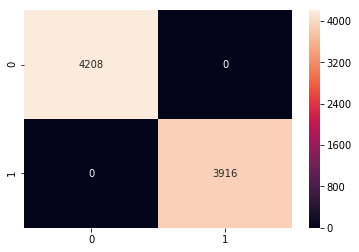

--------------------------------------------------
1 KNN(K近傍法): 1.000000 (0.000000)
2 KNN(K近傍法): 1.000000 (0.000000)
3 KNN(K近傍法): 0.999692 (0.000615)
4 KNN(K近傍法): 1.000000 (0.000000)
5 KNN(K近傍法): 1.000000 (0.000000)
毒キノコ識別率(accuracy)：1.000000
             precision    recall  f1-score   support

          0   1.000000  1.000000  1.000000      4208
          1   1.000000  1.000000  1.000000      3916

avg / total   1.000000  1.000000  1.000000      8124

[[4208    0]
 [   0 3916]]


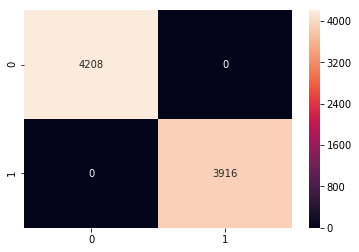

--------------------------------------------------
1 CART(決定木): 0.999846 (0.000308)
2 CART(決定木): 1.000000 (0.000000)
3 CART(決定木): 0.999538 (0.000923)
4 CART(決定木): 1.000000 (0.000000)
5 CART(決定木): 0.999538 (0.000923)
毒キノコ識別率(accuracy)：1.000000
             precision    recall  f1-score   support

          0   1.000000  1.000000  1.000000      4208
          1   1.000000  1.000000  1.000000      3916

avg / total   1.000000  1.000000  1.000000      8124

[[4208    0]
 [   0 3916]]


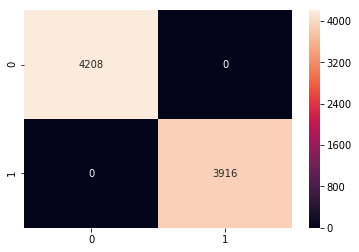

--------------------------------------------------
1 GaussianNB(ガウシアンナイーブベイズ): 0.966764 (0.004701)
2 GaussianNB(ガウシアンナイーブベイズ): 0.956300 (0.006250)
3 GaussianNB(ガウシアンナイーブベイズ): 0.952455 (0.013243)
4 GaussianNB(ガウシアンナイーブベイズ): 0.951991 (0.007186)
5 GaussianNB(ガウシアンナイーブベイズ): 0.962462 (0.006388)
毒キノコ識別率(accuracy)：0.959872
             precision    recall  f1-score   support

          0   0.999228  0.923241  0.959733      4208
          1   0.923749  0.999234  0.960010      3916

avg / total   0.962845  0.959872  0.959867      8124

[[3885  323]
 [   3 3913]]


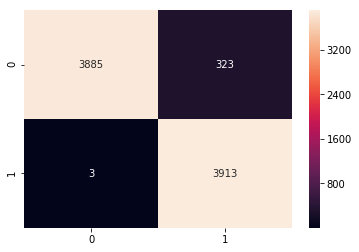

--------------------------------------------------
1 SVM(サポートベクタマシン): 0.997692 (0.000843)
2 SVM(サポートベクタマシン): 0.997692 (0.001614)
3 SVM(サポートベクタマシン): 0.998308 (0.001846)
4 SVM(サポートベクタマシン): 0.997384 (0.001982)
5 SVM(サポートベクタマシン): 0.997692 (0.001614)
毒キノコ識別率(accuracy)：0.998523
             precision    recall  f1-score   support

          0   0.997156  1.000000  0.998576      4208
          1   1.000000  0.996936  0.998465      3916

avg / total   0.998527  0.998523  0.998523      8124

[[4208    0]
 [  12 3904]]


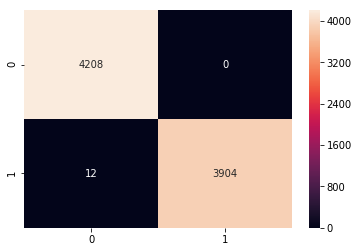

--------------------------------------------------
1 RF(ランダムフォレスト): 1.000000 (0.000000)
2 RF(ランダムフォレスト): 1.000000 (0.000000)
3 RF(ランダムフォレスト): 0.999538 (0.000923)
4 RF(ランダムフォレスト): 1.000000 (0.000000)
5 RF(ランダムフォレスト): 1.000000 (0.000000)
毒キノコ識別率(accuracy)：1.000000
             precision    recall  f1-score   support

          0   1.000000  1.000000  1.000000      4208
          1   1.000000  1.000000  1.000000      3916

avg / total   1.000000  1.000000  1.000000      8124

[[4208    0]
 [   0 3916]]


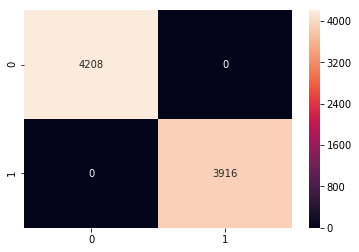

--------------------------------------------------


In [5]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn import metrics as mtr
from sklearn.metrics import mean_squared_error, mean_absolute_error
from collections import defaultdict
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score

results = []
names = []
model_predictions = defaultdict()
model_score = defaultdict(np.float)

for name, model in models:   
    kf = KFold(n_splits=5, random_state=1234, shuffle=True)
    kf.get_n_splits(X, Y)
    df_result = pd.DataFrame()
    i = 0
    #print(name)
    
    for train_index, test_index in kf.split(X, Y):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X.iloc[train_index], X.iloc[test_index] 
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
        cv_results = cross_val_score(model, X_train, y_train.iloc[:,1], cv=kf, scoring='accuracy')    
        results.append(cv_results)
        names.append(name)
        i = i + 1
        msg = "%s: %f (%f)" % (name,cv_results.mean(), cv_results.std())
        print(i,msg)

        model.fit(X_train, y_train.iloc[:,1])
        y_pred = model.predict(X_test)
        df = pd.DataFrame({"y_test":y_test.iloc[:,1], "y_pred":y_pred})
        df_result = pd.concat([df_result, df], axis=0)

    # 評価指標の算出
    y_test = df_result["y_test"]
    y_pred = df_result["y_pred"]
    print("毒キノコ識別率(accuracy)：%7.6f" %  (accuracy_score(y_test, y_pred)))
    print(classification_report(y_test, y_pred,digits=6))
   
    print(confusion_matrix(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt='d')
    plt.show()
    print("--------------------------------------------------")

#### 上記結果から以下のClassifier が有効
##### ロジステック回帰、K近傍法、決定木、ランダムフォレスト